# EDA of House Prices

## Data Processing

### Loading Libraries and Dataset

First, import the required libraries and load the dataset. I use `pandas` for data manipulation, `matplotlib` and seaborn for visualizations, and `numpy` for numeric operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from scipy import stats

# Load the dataset
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Display the first few rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Initial Inspection of Data

Check the structure and basic statistics of the data:

In [2]:
# Check data shape and types
train.shape # Rows and columns
train.dtypes.value_counts()  # Number of categorical vs numerical columns

# Summary statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
# create a copy of the original data
train_origin = train.copy()
test_origin = test.copy()

### Missing Data

In [4]:
# Missing values per column
missing = train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train)) * 100
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_data[missing_data['Missing Values'] > 0]  # Only show columns with missing values

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


**Missing Values Analysis**

- **High Missing Values**: Columns like `PoolQC`, `MiscFeature`, and `Alley` have more than 90% missing values, which might indicate that these features are not present for most houses.
- **Moderate Missing Values**: Columns such as `Fence`, `MasVnrType`, and `FireplaceQu` have a significant amount of missing data, ranging from 40% to 80%.
- **Low Missing Values**: Columns like `LotFrontage`, `GarageYrBlt`, and `BsmtFinType2` have less than 20% missing values, which might be easier to handle through imputation or other techniques.
- **Minimal Missing Values**: Columns such as `MasVnrArea` and `Electrical` have very few missing values, making them less of a concern.

This analysis helps in deciding the appropriate data cleaning strategies, such as imputation, removal, or other techniques to handle missing values effectively.

- The data indicates that the vast majority of houses in the dataset do not have a `pool`, any `miscellaneous features` (such as a shed or garage), and `alley access`, so I choose to drop it.

- `MasVnrType` (59.73% missing): The type of masonry veneer for the house. If missing, it likely means there is no masonry veneer.

- `FireplaceQu` (47.26% missing): Since not all houses have a fireplace.

- `LotFrontage` is about 18%. Impute using the median, as it's more robust to outliers.

In [5]:
# Drop the specified columns
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

Impute `MasVnrType` with Most Frequent Value or Create a New Category

In [6]:
# Impute with the most frequent value (mode)
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

Impute `FireplaceQu` with Mode or Create a New Category

In [7]:
# Impute with the most frequent value (mode)
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
test['FireplaceQu'] =  test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])

Impute `LotFrontage` Using the Median or Group-Based Median

In [8]:
# Impute based on neighborhood (group median)
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

`GarageYrBlt`, `GarageCond`, `GarageType`, `GarageFinish`, `GarageQual` (5.55% missing): These are garage-related features. If missing, it likely means the house does not have a garage

Impute categorical columns (GarageCond, GarageType, GarageFinish, GarageQual) with "None".
Impute GarageYrBlt with 0 or another value that makes sense, indicating the absence of a garage.

In [9]:
train = train.copy()
test = test.copy()

garage_cols = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']

for col in garage_cols:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

garage_num_cols = ['GarageCars', 'GarageArea']
for col in garage_num_cols:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(1801)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(1801)

`BsmtFinType2`, `BsmtExposure`, `BsmtQual`, `BsmtCond`, `BsmtFinType1` (2.53%-2.60% missing): These represent basement-related features. If missing, it could indicate the house does not have a basement.

Impute categorical columns with "None".

In [10]:
bsmt_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for col in bsmt_cols:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

bmst_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in bmst_num_cols:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

- `MasVnrArea` (0.55% missing): This is a numeric column representing the masonry veneer area. If MasVnrType is "None", impute MasVnrArea with 0 (no masonry veneer).

- `Electrical` (0.07% missing): Since this is a categorical column with very few missing values, you can:
Impute using the most frequent category (mode).

In [11]:
# train = train.copy()
# test = test.copy()

train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0);

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

Impute `SaleType` Using the 'Oth' for others

In [12]:
train['SaleType'] = train['SaleType'].fillna('Oth')
test['SaleType'] = test['SaleType'].fillna('Oth')

Impute `MSZoning` with Mode

Since only 0.27% of values are missing, it's safe to impute with the mode.

In [13]:
# Impute MSZoning with the most frequent value (mode)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

Impute `Functional` with Mode

Similar to MSZoning, this column has very few missing values, so using the mode is a good option.

In [14]:
# Impute Functional with the most frequent value (mode)
train['Functional'] = train['Functional'].fillna(train['Functional'].mode()[0])
test['Functional'] =  test['Functional'].fillna(test['Functional'].mode()[0])

Impute `Utilities` with Mode

In [15]:
# Impute Utilities with the most frequent value (mode)
train['Utilities'] = train['Utilities'].fillna(train['Utilities'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])

Impute `KitchenQual` with Mode

Since it's only missing one value, the mode is a good choice.

In [16]:
# Impute KitchenQual with the most frequent value (mode)
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

Impute `Exterior2nd` and `Exterior1st` with Mode

Both columns have only 1 missing value, so using the mode works well.

In [17]:
# Impute Exterior2nd with the most frequent value (mode)
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

# Impute Exterior1st with the most frequent value (mode)
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

### Handling Duplicate

**Identify Duplicate**

In [18]:
# Find duplicate rows
duplicates = train.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

# Remove duplicates
train = train.drop_duplicates()
test = test.drop_duplicates()

Number of duplicates: 0


### Checking Data Types and Converting Columns
Convert date columns to `datetime`.

In [45]:
train['LotFrontage'] = pd.to_numeric(train['LotFrontage'], errors='coerce')
test['LotFrontage'] = pd.to_numeric(test['LotFrontage'], errors='coerce')

train['MasVnrArea'] = pd.to_numeric(train['MasVnrArea'], errors='coerce')
test['MasVnrArea'] = pd.to_numeric(test['MasVnrArea'], errors='coerce')
train['BsmtFinSF1'] = pd.to_numeric(train['BsmtFinSF1'], errors='coerce')
test['BsmtFinSF1'] = pd.to_numeric(test['BsmtFinSF1'], errors='coerce')
train['BsmtFinSF2'] = pd.to_numeric(train['BsmtFinSF2'], errors='coerce')
test['BsmtFinSF2'] = pd.to_numeric(test['BsmtFinSF2'], errors='coerce')
train['BsmtUnfSF'] = pd.to_numeric(train['BsmtUnfSF'], errors='coerce')
test['BsmtUnfSF'] = pd.to_numeric(test['BsmtUnfSF'], errors='coerce')
train['TotalBsmtSF'] = pd.to_numeric(train['TotalBsmtSF'], errors='coerce')
test['TotalBsmtSF'] = pd.to_numeric(test['TotalBsmtSF'], errors='coerce')
train['BsmtFullBath'] = pd.to_numeric(train['BsmtFullBath'], errors='coerce')
test['BsmtFullBath'] = pd.to_numeric(test['BsmtFullBath'], errors='coerce')
train['BsmtHalfBath'] = pd.to_numeric(train['BsmtHalfBath'], errors='coerce')
test['BsmtHalfBath'] = pd.to_numeric(test['BsmtHalfBath'], errors='coerce')
train['GarageCars'] = pd.to_numeric(train['GarageCars'], errors='coerce')
test['GarageCars'] = pd.to_numeric(test['GarageCars'], errors='coerce')
train['GarageArea'] = pd.to_numeric(train['GarageArea'], errors='coerce')
test['GarageArea'] = pd.to_numeric(test['GarageArea'], errors='coerce')
train['OverallQual'] = pd.to_numeric(train['OverallQual'], errors='coerce')
test['OverallQual'] = pd.to_numeric(test['OverallQual'], errors='coerce')
train['OverallCond'] = pd.to_numeric(train['OverallCond'], errors='coerce')
test['OverallCond'] = pd.to_numeric(test['OverallCond'], errors='coerce')

train['YearBuilt'] = pd.to_datetime(train['YearBuilt'], format='%Y', errors='coerce')
test['YearBuilt'] = pd.to_datetime(test['YearBuilt'], format='%Y', errors='coerce')

train['YearRemodAdd'] = pd.to_datetime(train['YearRemodAdd'], format='%Y', errors='coerce')
test['YearRemodAdd'] = pd.to_datetime(test['YearRemodAdd'], format='%Y', errors='coerce')

train['GarageYrBlt'] = pd.to_datetime(train['GarageYrBlt'], format='%Y', errors='coerce')
test['GarageYrBlt'] = pd.to_datetime(test['GarageYrBlt'], format='%Y', errors='coerce')

train['YrSold'] = pd.to_datetime(train['YrSold'], format='%Y', errors='coerce')
test['YrSold'] = pd.to_datetime(test['YrSold'], format='%Y', errors='coerce')

train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

### Handling Outliers

**Identify Outliers**

IQR (Interquartile Range): Outliers can be defined as values that are 1.5 times the IQR above the third quartile or below the first quartile.

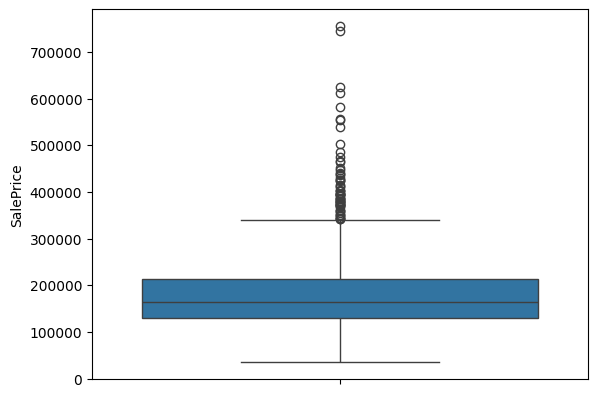

In [20]:
sns.boxplot(data=train['SalePrice'])
plt.show()

In [21]:
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['SalePrice'] < (Q1 - 1.5 * IQR)) | (train['SalePrice'] > (Q3 + 1.5 * IQR))]

len(outliers) / len(train) * 100 # Percentage of outliers

4.178082191780822

**Handling Outliers**

Log Transformation: This can help to reduce the impact of outliers, particularly with skewed data like house prices.

<Axes: >

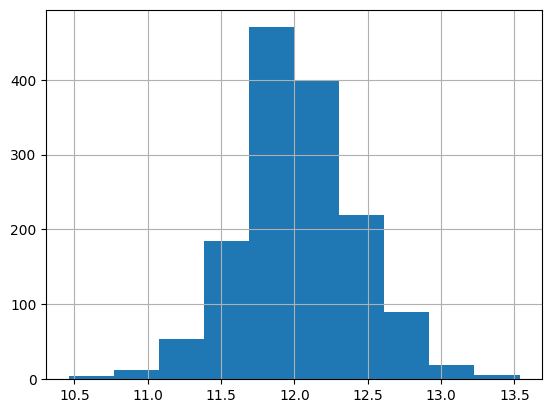

In [22]:
train['SalePrice_log'] = np.log(train['SalePrice'])  
train['SalePrice_log'].hist()

**Other features**

In [23]:
# Boxplot for 'LotFrontage'
# sns.boxplot(x=train['LotFrontage'])

# Filter out the outliers
# Remove outliers for 'LotFrontage' > 300
train = train[train['LotFrontage'] < 300]
test = test[test['LotFrontage'] < 300]

In [24]:
# sns.boxplot(x=train['LotArea'])

# Remove outliers for 'LotArea' > 100000
train = train[train['LotArea'] < 100000]
test = test[test['LotArea'] < 100000]

In [25]:
# sns.boxplot(x=train['TotalBsmtSF'])

# Remove outliers for 'TotalBsmtSF' > 3000
train = train[train['TotalBsmtSF'] < 3000]
test = test[test['TotalBsmtSF'] < 3000]

In [26]:
# sns.boxplot(x=train['1stFlrSF'])

# Remove outliers for '1stFlrSF' > 3000
train = train[train['1stFlrSF'] < 3000]
test = test[test['1stFlrSF'] < 3000]

In [27]:
# sns.boxplot(x=train['2ndFlrSF'])

# Remove outliers for '2ndFlrSF' > 1500
train = train[train['2ndFlrSF'] < 1500]
test = test[test['2ndFlrSF'] < 1500]

In [28]:
# sns.boxplot(x=train['GrLivArea'])

# Remove outliers for 'GrLivArea' > 4000
train = train[train['GrLivArea'] < 4000]
test = test[test['GrLivArea'] < 4000]

In [29]:
# sns.boxplot(x=train['GarageArea'])

# Remove outliers for 'GarageArea' > 1200
train = train[train['GarageArea'] < 1200]
test = test[test['GarageArea'] < 1200]

In [30]:
# sns.boxplot(x=train['WoodDeckSF'])

# Remove outliers for 'WoodDeckSF' > 600
train = train[train['WoodDeckSF'] < 600]
test = test[test['WoodDeckSF'] < 600]

In [31]:
# sns.boxplot(x=train['OpenPorchSF'])

# Remove outliers for 'OpenPorchSF' > 300
train = train[train['OpenPorchSF'] < 300]
test = test[test['OpenPorchSF'] < 300]

In [32]:
# sns.boxenplot(x=train['MiscVal'])

# Remove outliers for 'MiscVal' > 5000
train = train[train['MiscVal'] < 5000]
test = test[test['MiscVal'] < 5000]

### Final Consistency and Missing Checking

In [33]:
# After preprocessing
assert train.isnull().sum().sum() == 0
assert test.isnull().sum().sum() == 0

In [34]:
# Save processed data
train.to_csv('data/train_cleaned.csv', index=False)
test.to_csv('data/test_cleaned.csv', index=False)

### Visualiziing Difference between origin and cleaned data

In [35]:
# train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
# modified_columns = ['SalePrice' ,'MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'Electrical', 'SaleType', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal']
modified_columns = ['SalePrice' ,'MasVnrType', 'FireplaceQu', 'LotFrontage','MasVnrArea', 'MSZoning', 'TotalBsmtSF', 'LotArea', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MiscVal']
key_columns = ['SalePrice', 'GrLivArea', 'LotFrontage', 'GarageArea']
numeric_features = train[modified_columns].select_dtypes(include=[np.number]).columns.tolist()

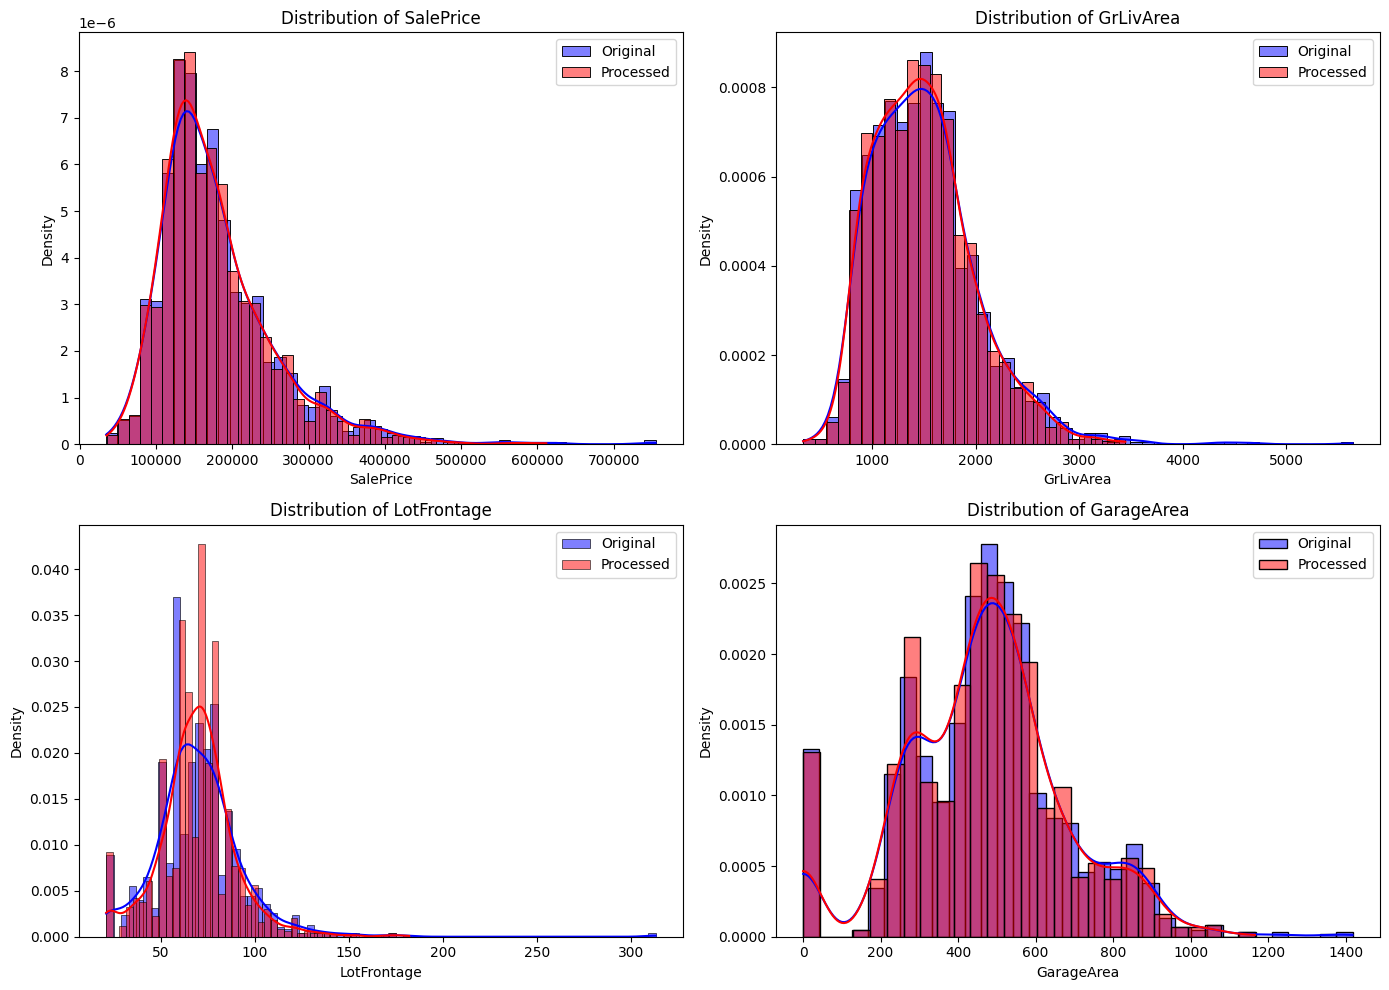

In [36]:
# Comparison of distributions with histograms
plt.figure(figsize=(14, 10))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_origin[col], color='blue', label='Original', kde=True, stat="density", alpha=0.5)
    sns.histplot(train[col], color='red', label='Processed', kde=True, stat="density", alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

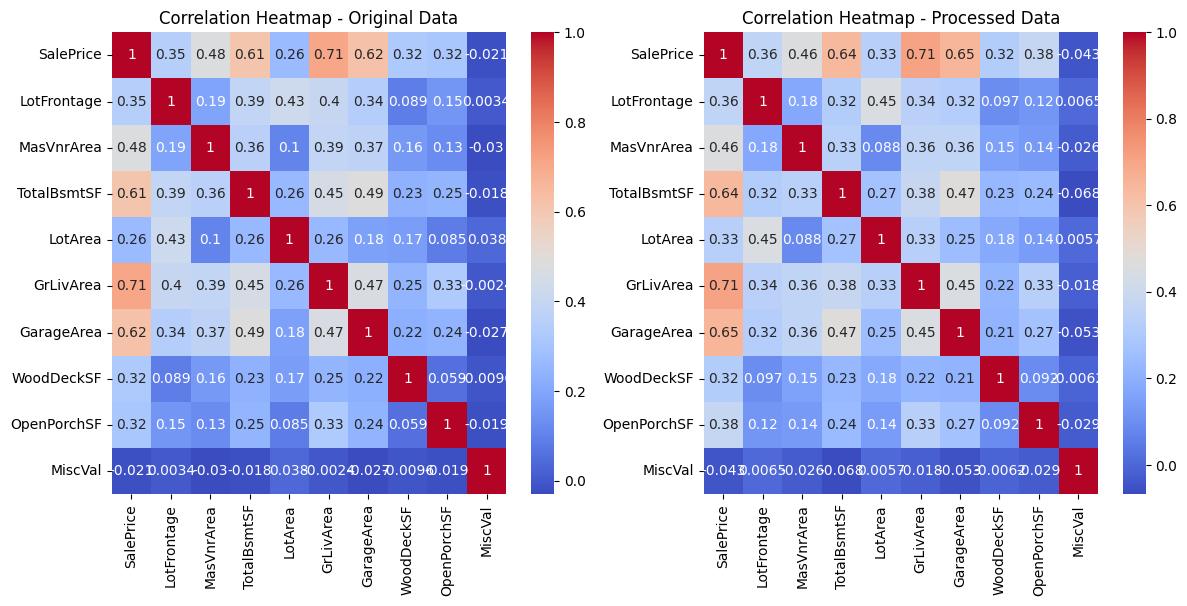

In [37]:
# Comparison of correlations with heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(train_origin[numeric_features].corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Heatmap - Original Data')
sns.heatmap(train[numeric_features].corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation Heatmap - Processed Data')
plt.show()

## Visualizing Target Variable

The target variable here is `SalePrice`, and we first explore its distribution to understand the overall range and trends.

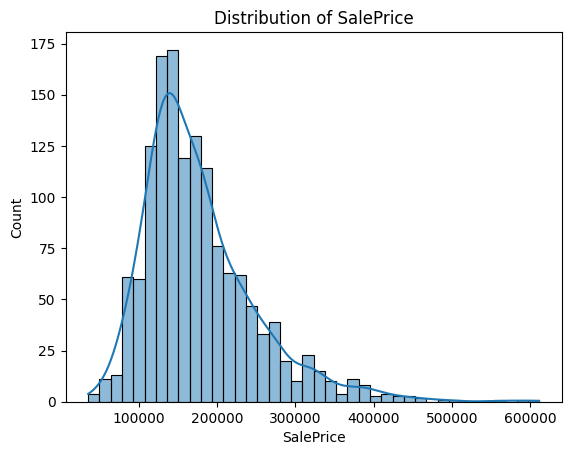

Skewness: 1.4524507071693824
Kurtosis: 3.345721060671714


In [38]:
# Distribution of SalePrice
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Checking skewness and kurtosis
print(f"Skewness: {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")

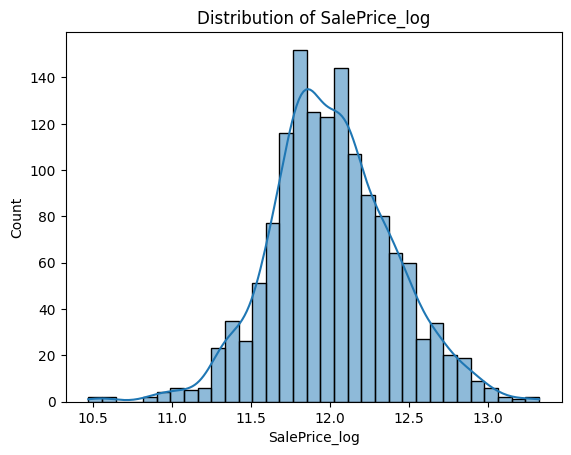

Skewness: 0.04526838565674625
Kurtosis: 0.561414083917247


In [39]:
# Distribution of SalePrice
sns.histplot(train['SalePrice_log'], kde=True)
plt.title('Distribution of SalePrice_log')
plt.show()

# Checking skewness and kurtosis
print(f"Skewness: {train['SalePrice_log'].skew()}")
print(f"Kurtosis: {train['SalePrice_log'].kurt()}")

### Feature Relationships

Check the relationship between features and the target variable(`SalePrice`).

**Correlation Matrix**

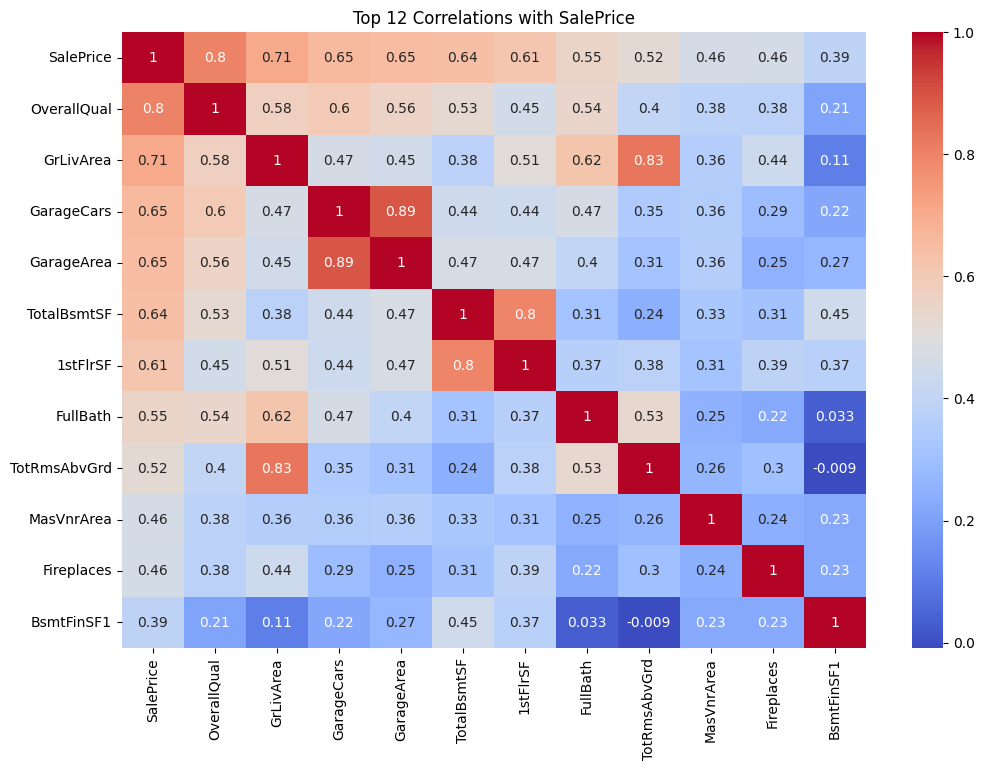

In [50]:
# Select only numeric columns
N = 12
numeric_cols = train.select_dtypes(include=[np.number])
correlations = numeric_cols.corr()['SalePrice'].abs().sort_values(ascending=False)
correlations = correlations.drop('SalePrice_log')  # Remove SalePrice_log itself
top_N_correlations = correlations.head(N)

# Plot the top N correlations
plt.figure(figsize=(12, 8))
sns.heatmap(train[top_N_correlations.index].corr(), annot=True, cmap='coolwarm')
plt.title(f'Top {N} Correlations with SalePrice')
plt.show()

The heatmap visualizations provide a comprehensive view of the correlations between various features in the dataset. Here are some key observations:

1. **Strong Correlations**:
    - `OverallQual` shows a strong positive correlation with `SalePrice`, indicating that higher quality ratings are associated with higher sale prices.
    - `GrLivArea` (Above ground living area) also has a strong positive correlation with `SalePrice`, suggesting that larger living areas contribute to higher house prices.
    - `GarageCars` and `GarageArea` both show significant positive correlations with `SalePrice`, highlighting the importance of garage size and capacity in determining house prices.
    - `TotalBsmtSF` (Total basement area) and `1stFlrSF` (First floor area) are positively correlated with `SalePrice`, indicating that larger basements and first floors are valued higher.

2. **Moderate Correlations**:
    - `FullBath` (Number of full bathrooms) and `TotRmsAbvGrd` (Total rooms above ground) have moderate positive correlations with `SalePrice`, suggesting that more bathrooms and rooms contribute to higher house prices.
    - `MasVnrArea` (Masonry veneer area) and `Fireplaces` also show moderate positive correlations with `SalePrice`, indicating that these features add value to the property.

3. **Weak Correlations**:
    - Features like `BsmtFinSF1` (Type 1 finished square feet) show weaker correlations with `SalePrice`, but still contribute to the overall value of the house.

4. **Comparison Between Original and Processed Data**:
    - The heatmaps for both the original and processed data show similar patterns of correlation, indicating that the preprocessing steps have preserved the essential relationships between features and the target variable (`SalePrice`).
    - The processed data heatmap may show slightly stronger or clearer correlations due to the handling of missing values, outliers, and feature engineering.

These insights from the heatmap analysis can guide further feature selection and engineering steps, as well as model building and evaluation.

C:\Users\Hao\AppData\Local\Temp\ipykernel_2368\3425133481.py:1: FutureWarning: The provided callable <function median at 0x0000024AF5CEE660> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


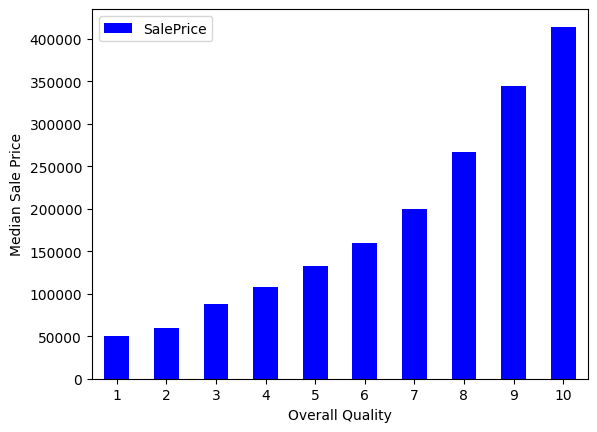

In [51]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

**Pairplot and Scatterplots**

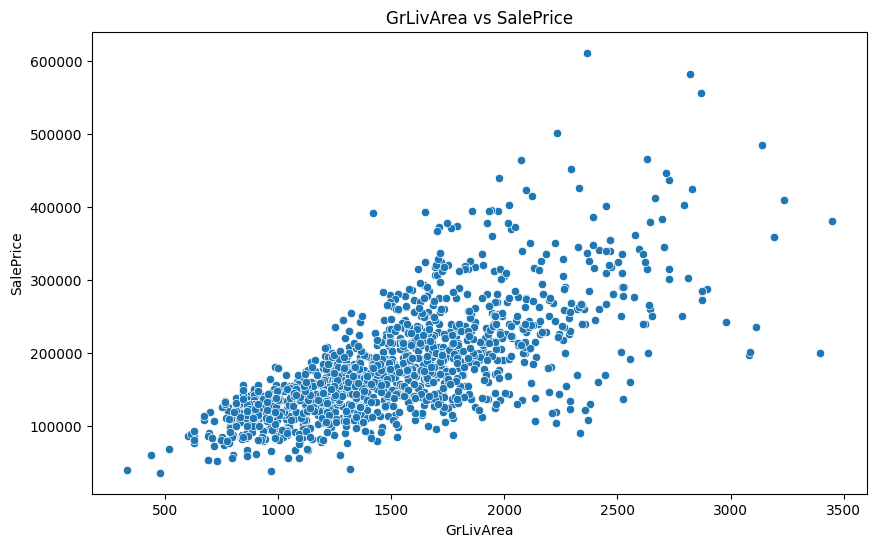

In [132]:
# Scatterplot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.show()

**Categorical Feature Analysis**

Check for outliers that might negatively affect our model.

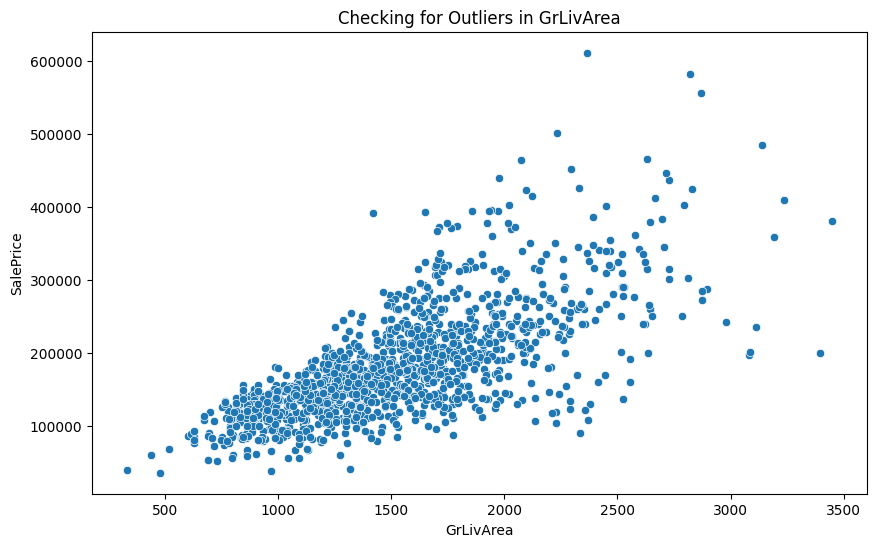

In [133]:
# Identifying potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Checking for Outliers in GrLivArea')
plt.show()

# Removing outliers
train = train[train['GrLivArea'] < 4500]  # Removing houses with large GrLivArea outliers

## Categorical Encoding

### Ordinal Encoding
Map quality to number

- `ExterQual`: Evaluates the quality of the material on the exterior

- `ExterCond`: Evaluates the present condition of the material on the exterior

- `BsmtQual`: Evaluates the height of the basement

- `BsmtCond`: Evaluates the general condition of the basement

- `HeatingQC`: Heating quality and condition

- `KitchenQual`: Kitchen quality

- `FireplaceQu`: Fireplace quality

- `GarageQual`: Garage quality

- `GarageCond`: Garage condition

In [63]:
quality_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,   # Poor
    'NA': 0,   # None
    'None': 0   # None
}

train['ExterQual'] = train['ExterQual'].map(quality_mapping)
test['ExterQual'] = test['ExterQual'].map(quality_mapping)
train['ExterCond'] = train['ExterCond'].map(quality_mapping)
test['ExterCond'] = test['ExterCond'].map(quality_mapping)
train['BsmtQual'] = train['BsmtQual'].map(quality_mapping)
test['BsmtQual'] = test['BsmtQual'].map(quality_mapping)
train['BsmtCond'] = train['BsmtCond'].map(quality_mapping)
test['BsmtCond'] = test['BsmtCond'].map(quality_mapping)
train['HeatingQC'] = train['HeatingQC'].map(quality_mapping)
test['HeatingQC'] = test['HeatingQC'].map(quality_mapping)
train['KitchenQual'] = train['KitchenQual'].map(quality_mapping)
test['KitchenQual'] = test['KitchenQual'].map(quality_mapping)
train['FireplaceQu'] = train['FireplaceQu'].map(quality_mapping)
test['FireplaceQu'] = test['FireplaceQu'].map(quality_mapping)
train['GarageQual'] = train['GarageQual'].map(quality_mapping)
test['GarageQual'] = test['GarageQual'].map(quality_mapping)
train['GarageCond'] = train['GarageCond'].map(quality_mapping)
test['GarageCond'] = test['GarageCond'].map(quality_mapping)

In [64]:
finished_mapping = {
    'GLQ': 6,  # Good Living Quarters
    'ALQ': 5,  # Average Living Quarters
    'BLQ': 4,  # Below Average Living Quarters
    'Rec': 3,  # Average Rec Room
    'LwQ': 2,  # Low Quality
    'Unf': 1,  # Unfinshed
    'NA': 0,   # None
    'None': 0   # None
}

train['BsmtFinType1'] = train['BsmtFinType1'].map(finished_mapping)
test['BsmtFinType1'] = test['BsmtFinType1'].map(finished_mapping)
train['BsmtFinType2'] = train['BsmtFinType2'].map(finished_mapping)
test['BsmtFinType2'] = test['BsmtFinType2'].map(finished_mapping)

### Target Encoding
**Replace categories with mean target value**

Here's why these features benefit from target encoding:

1. High cardinality features (many unique values):
- `Neighborhood`: Different areas have distinct price levels
- `MSSubClass`: Many types of dwelling
- `Exterior1st` and `Exterior2nd`: Many materials types

2. Features with strong price correlation:
- `SaleType` and `SaleCondition`: Different sale types affect price
- `BldgType` and `HouseStyle`: Building types have distinct price ranges
- `Condition1` and `Condition2`: Location features affect price

3. Features with meaningful relationships:
- `Foundation`: Different types impact house value
- `GarageType`: Garage characteristics affect price
- `MasVnrType`: Material quality indicates price range

4. One value is overwhelmingly dominant
- `Street`: 

In [65]:
def target_encoder(df, features, target, n_splits=5, alpha=5):
    """
    Performs target encoding with k-fold cross-validation to prevent leakage

    Parameters:
    -----------
    df : DataFrame
        Input dataset
    features : list
        List of categorical features to encode
    target : str
        Name of the target variable
    n_splits : int
        Number of folds for cross-validation
    alpha : float
        Smoothing parameter

    Returns:
    --------
    DataFrame with encoded features
    """
    
    df_encoded = df.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for feature in features:
        # Calculate global mean
        global_mean = df[target].mean()

        # Create a new column for the encoding
        df_encoded[f'{feature}_target_enc'] = np.nan

        # Perform k-fold target encoding
        for train_idx, val_idx in kf.split(df):
            # Get the train and validation sets
            train = df.iloc[train_idx]
            val = df.iloc[val_idx]

            # Calculate means for each category in training set
            means = train.groupby(feature)[target].agg(['mean', 'count'])

            # Apply smoothing
            smoothed_means = (means['mean'] * means['count'] + global_mean * alpha) / (means['count'] + alpha)

            # Map the means to validation set
            df_encoded.iloc[val_idx, df_encoded.columns.get_loc(f'{feature}_target_enc')] = \
                val[feature].map(smoothed_means).fillna(global_mean)

    return df_encoded

# List of features that benefit from target encoding
categorical_features = [
    'MSSubClass',      # Type of dwelling
    'MSZoning',        # General zoning classification
    'Neighborhood',    # Physical locations
    'Condition1',      # Proximity to various conditions
    'Condition2',      # Proximity to various conditions (if more than one)
    'BldgType',        # Type of dwelling
    'HouseStyle',      # Style of dwelling
    'RoofStyle',       # Type of roof
    'Exterior1st',     # Exterior covering on house
    'Exterior2nd',     # Exterior covering on house (if more than one)
    'Foundation',      # Type of foundation
    'SaleType',        # Type of sale
    'SaleCondition',   # Condition of sale
    'Street',          # Type of road access
    'LotConfig',       # Lot configuration
    'LandSlope',       # Slope of property
    'Functional',      # Home functionality
    'MasVnrType',      # Masonry veneer type
    'GarageType',      # Garage location
]

# Apply target encoding
encoded_train = target_encoder(
    train,
    features=categorical_features,
    target='SalePrice'
)

# For test set, use means from entire training set
global_mean = train['SalePrice'].mean()
encoded_test = test.copy()

for feature in categorical_features:
    means = train.groupby(feature)['SalePrice'].mean()
    encoded_test[f'{feature}_target_enc'] = test[feature].map(means).fillna(global_mean)

# Override the content of train and test
train = encoded_train
test = encoded_test

In [66]:
train['BsmtFinType1'].value_counts()

Series([], Name: count, dtype: int64)

### One-Hot encoding
For features with few unique values

In [67]:
def one_hot_encode_sklearn(df, features):
    """
    Function to apply one-hot encoding using sklearn's OneHotEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    features (list): A list of column names in the DataFrame to apply one-hot encoding.
    
    Returns:
    pd.DataFrame: A DataFrame with the specified features one-hot encoded.
    """
    # Initialize OneHotEncoder
    ohe = OneHotEncoder(sparse_output=False, drop=None)  # Use drop='first' to drop the first category if needed
    
    # Fit and transform only the specified features
    df_to_encode = df[features]
    
    # Perform one-hot encoding and return it as a DataFrame
    ohe_encoded = ohe.fit_transform(df_to_encode)
    
    # Create a DataFrame with encoded feature names
    encoded_columns = ohe.get_feature_names_out(features)
    df_encoded = pd.DataFrame(ohe_encoded, columns=encoded_columns, index=df.index)
    
    # Drop original features and concatenate the encoded features
    df_final = pd.concat([df.drop(features, axis=1), df_encoded], axis=1)
    
    return df_final

# Features that benefit from one-hot encoding
onehot_features = [
    'CentralAir',    # Y/N for central air
    'PavedDrive',    # Y/P/N for paved driveway
    'LotShape',      # Regular, Irregular, etc.
    'LotConfig',     # Inside, Corner, etc.
    'Utilities',     # All public, NoSeWa, etc.
    'LandContour',   # Level, Low, etc.
    'BsmtExposure',  # None, Partial, etc.
    'Electrical',    # SBrkr, FuseA, etc.
    'Heating'        # GasA, GasW, etc.
]

encoded_train = one_hot_encode_sklearn(train, onehot_features)
train = encoded_train
test = encoded_test

# Function to handle missing values in categorical features
def handle_missing_categories(df, features):
    """
    Fill missing values in categorical features with 'Missing'
    """
    df_cleaned = df.copy()
    for feature in features:
        df_cleaned[feature] = df_cleaned[feature].fillna('Missing')
    return df_cleaned

### Binary Encoding
In cases where one value is overwhelmingly dominant, **binary encoding** is a suitable method for encoding categorical variables.

In [68]:
# train['Street_Binary'] = train['Street'].map({'Pave': 1, 'Grvl': 0})
# test['Street_Binary'] = test['Street'].map({'Pave': 1, 'Grvl': 0})
# train['Utilities_Binary'] = train['Utilities'].map({'AllPub': 1, 'NoSeWa': 0, 'None': 0})
# test['Utilities_Binary'] = test['Utilities'].map({'AllPub': 1, 'NoSeWa': 0, 'None': 0})

# # Group all rare categories into 'Other'
# rare_categories = ['Feedr', 'Artery', 'RRNn', 'PosA', 'PosN', 'RRAn', 'RRAe']
# train['Condition2_Binary'] = train['Condition2'].apply(lambda x: 1 if x == 'Norm' else 0)
# test['Condition2_Binary'] = test['Condition2'].apply(lambda x: 1 if x == 'Norm' else 0)
# train['RoofMatl_Binary'] = train['RoofMatl'].apply(lambda x: 1 if x == 'CompShg' else 0)
# test['RoofMatl_Binary'] = test['RoofMatl'].apply(lambda x: 1 if x == 'CompShg' else 0)

# train.drop(columns=['Street'], inplace=True)
# test.drop(columns=['Street'], inplace=True)
# train.drop(columns=['Utilities'], inplace=True)
# test.drop(columns=['Utilities'], inplace=True)
# train.drop(columns=['Condition2'], inplace=True)
# test.drop(columns=['Condition2'], inplace=True)
# train.drop(columns=['RoofMatl'], inplace=True)
# test.drop(columns=['RoofMatl'], inplace=True)

### Outliers and Range Consistency Check
**Checking Numeric Featrue Ranges**

Check that numeric values are within a reasonable range. If values fall outside the expected range, investigate and correct them.

In [69]:
# Convert 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold' columns to datetime
for col in ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold']:
    train[col] = pd.to_datetime(train[col], format='%Y', errors='coerce')  # errors='coerce' handles invalid dates
    test[col] = pd.to_datetime(test[col], format='%Y', errors='coerce')

from datetime import datetime

min_year = 1800  # Adjust this based on your data
max_year = datetime.now().year  # Current year

# Now you can use .dt accessor
train = train[(train['YearBuilt'].dt.year >= min_year) & (train['YearBuilt'].dt.year <= max_year)]
test = test[(test['YearBuilt'].dt.year >= min_year) & (test['YearBuilt'].dt.year <= max_year)]
train = train[(train['GarageYrBlt'].dt.year >= min_year) & (train['GarageYrBlt'].dt.year <= max_year)]
test = test[(test['GarageYrBlt'].dt.year >= min_year) & (test['GarageYrBlt'].dt.year <= max_year)]
train = train[(train['YearRemodAdd'].dt.year >= min_year) & (train['YearRemodAdd'].dt.year <= max_year)]
test = test[(test['YearRemodAdd'].dt.year >= min_year) & (test['YearRemodAdd'].dt.year <= max_year)]
train = train[(train['YrSold'].dt.year >= min_year) & (train['YrSold'].dt.year <= max_year)]
test = test[(test['YrSold'].dt.year >= min_year) & (test['YrSold'].dt.year <= max_year)]

train = train[train['MasVnrArea'] >= 0]
test = test[test['MasVnrArea'] >= 0]
train = train[train['BsmtFinSF1'] >= 0]
test = test[test['BsmtFinSF1'] >= 0]
train = train[train['TotalBsmtSF'] >= 0]
test = test[test['TotalBsmtSF'] >= 0]
train = train[train['TotRmsAbvGrd'] >= 0]
test = test[test['TotRmsAbvGrd'] >= 0]
train = train[train['1stFlrSF'] >= 0]
test = test[test['1stFlrSF'] >= 0]
train = train[train['2ndFlrSF'] >= 0]
test = test[test['2ndFlrSF'] >= 0]
train = train[train['GrLivArea'] >= 0]
test = test[test['GrLivArea'] >= 0]
train = train[train['GarageArea'] >= 0]
test = test[test['GarageArea'] >= 0]
train = train[train['WoodDeckSF'] >= 0]
test = test[test['WoodDeckSF'] >= 0]
train = train[train['OpenPorchSF'] >= 0]
test = test[test['OpenPorchSF'] >= 0]
train = train[train['EnclosedPorch'] >= 0]
test = test[test['EnclosedPorch'] >= 0]

In [70]:
# Save processed data
train.to_csv('data/train_processed.csv', index=False)
test.to_csv('data/test_processed.csv', index=False)